In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("Building_and_Safety_Permit_Information.csv",low_memory=False)

In [3]:
df.head()

,Assessor Book,Assessor Page,Assessor Parcel,Tract,Block,Lot,Reference # (Old Permit #),PCIS Permit #,Status,Status Date,...,Applicant Address 1,Applicant Address 2,Applicant Address 3,Zone,Occupancy,Floor Area-L.A. Building Code Definition,Census Tract,Council District,Latitude/Longitude,Applicant Relationship
0,4117,006,001,TR 8557,35,1,17LA76150,16010-10002-00098,Permit Finaled,09/29/2017,...,5117 MACAFEE RD,NaN,"TORRANCE, CA",R1-1,NaN,NaN,2781.02,11.0,"(33.95333, -118.44446)",Architect
1,2602,019,042,TR 21545,NaN,18,NaN,13042-20000-11279,Permit Finaled,07/11/2013,...,NaN,NaN,NaN,RE11-1-HPOZ,NaN,0.0,1066.41,12.0,"(34.30261, -118.50319)",Owner-Bldr
2,2565,008,069,TR 3971,NaN,1,17VN37597,16030-20000-06797,Permit Finaled,12/07/2017,...,NaN,NaN,NaN,R1-1-RFA,NaN,0.0,1011.10,7.0,"(34.25721, -118.28711)",Contractor
3,2233,010,004,TR 10869,NaN,1,14VN74792,14016-20000-07197,Permit Finaled,04/23/2014,...,NaN,NaN,NaN,[Q]R3-1,NaN,NaN,1276.06,6.0,"(34.19338, -118.4791)",Contractor
4,4314,005,009,BRUNDAGE PALM PLACE,NaN,14,NaN,17042-90000-00040,Permit Finaled,01/27/2017,...,1045 N GENESEE AVE,NaN,"LOS ANGELES, CA",R3-1,NaN,0.0,2699.05,5.0,"(34.02206, -118.40349)",Net Applicant


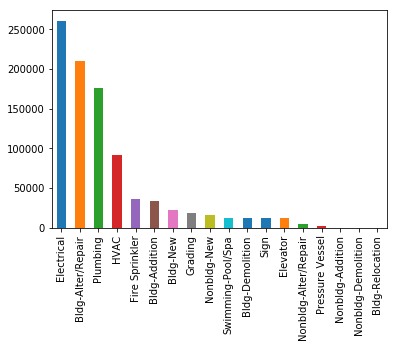

In [12]:
df["Permit Type"].value_counts().plot(kind="bar")

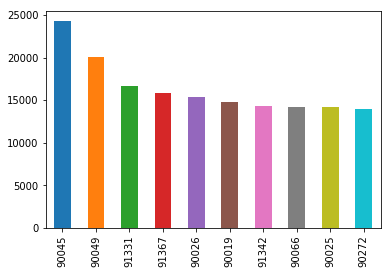

In [30]:
df["Zip Code"]=df["Zip Code"].fillna(0).astype(int)
df["Zip Code"].value_counts().head(10).plot(kind="bar")

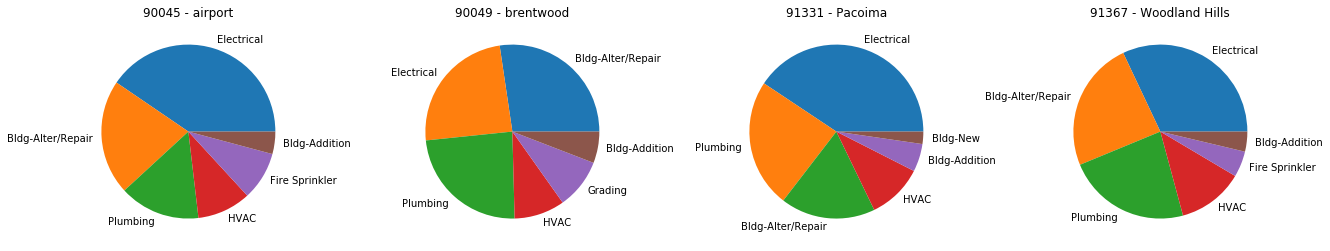

In [86]:
fig, [ax1,ax2,ax3,ax4] = plt.subplots(ncols=4)

df[df["Zip Code"]==90045]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax1,title="90045 - airport")
df[df["Zip Code"]==90049]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax2,title="90049 - brentwood")
df[df["Zip Code"]==91331]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax3,title="91331 - Pacoima")
df[df["Zip Code"]==91367]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax4,title="91367 - Woodland Hills")

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax1.set_aspect(1)
ax2.set_aspect(1)
ax3.set_aspect(1)
ax4.set_aspect(1)
plt.subplots_adjust(right=3)


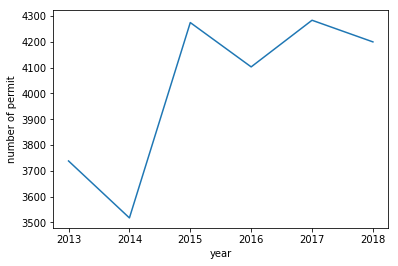

In [165]:
year=[2013,2014,2015,2016,2017,2018]
airport=[]
airport.append(len(df[(df['Issue Date'].str.contains('2013')) & (df["Zip Code"]==90045)]))
airport.append(len(df[(df['Issue Date'].str.contains('2014')) & (df["Zip Code"]==90045)]))
airport.append(len(df[(df['Issue Date'].str.contains('2015')) & (df["Zip Code"]==90045)]))
airport.append(len(df[(df['Issue Date'].str.contains('2016')) & (df["Zip Code"]==90045)]))
airport.append(len(df[(df['Issue Date'].str.contains('2017')) & (df["Zip Code"]==90045)]))
airport.append(len(df[(df['Issue Date'].str.contains('2018')) & (df["Zip Code"]==90045)]))

fig, ax = plt.subplots()
ax.set_xlabel('year')
ax.set_ylabel('number of permit')
plt.plot(year,airport)

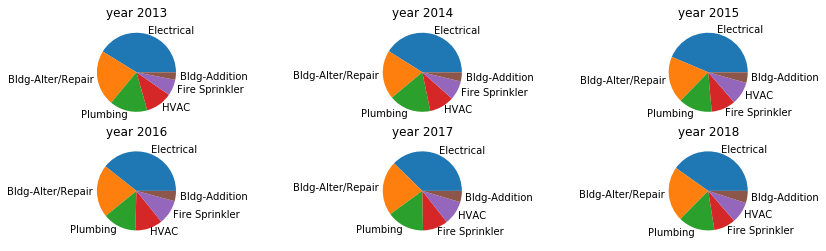

In [95]:
fig, [[ax1,ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2,3)

df[(df["Zip Code"]==90045) & (df['Issue Date'].str.contains('2013'))]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax1,title="year 2013")
df[(df["Zip Code"]==90045) & (df['Issue Date'].str.contains('2014'))]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax2,title="year 2014")
df[(df["Zip Code"]==90045) & (df['Issue Date'].str.contains('2015'))]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax3,title="year 2015")
df[(df["Zip Code"]==90045) & (df['Issue Date'].str.contains('2016'))]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax4,title="year 2016")
df[(df["Zip Code"]==90045) & (df['Issue Date'].str.contains('2017'))]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax5,title="year 2017")
df[(df["Zip Code"]==90045) & (df['Issue Date'].str.contains('2018'))]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax6,title="year 2018")

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')
ax6.set_ylabel('')
ax1.set_aspect(1)
ax2.set_aspect(1)
ax3.set_aspect(1)
ax4.set_aspect(1)
ax5.set_aspect(1)
ax6.set_aspect(1)
plt.subplots_adjust(right=2)

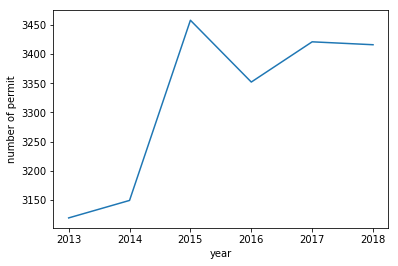

In [166]:
year=[2013,2014,2015,2016,2017,2018]
brentwood=[]
brentwood.append(len(df[(df['Issue Date'].str.contains('2013')) & (df["Zip Code"]==90049)]))
brentwood.append(len(df[(df['Issue Date'].str.contains('2014')) & (df["Zip Code"]==90049)]))
brentwood.append(len(df[(df['Issue Date'].str.contains('2015')) & (df["Zip Code"]==90049)]))
brentwood.append(len(df[(df['Issue Date'].str.contains('2016')) & (df["Zip Code"]==90049)]))
brentwood.append(len(df[(df['Issue Date'].str.contains('2017')) & (df["Zip Code"]==90049)]))
brentwood.append(len(df[(df['Issue Date'].str.contains('2018')) & (df["Zip Code"]==90049)]))
fig, ax = plt.subplots()
ax.set_xlabel('year')
ax.set_ylabel('number of permit')
plt.plot(year,brentwood)

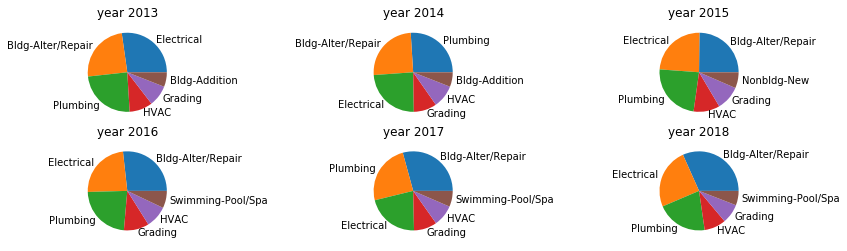

In [97]:
fig, [[ax1,ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2,3)

df[(df["Zip Code"]==90049) & (df['Issue Date'].str.contains('2013'))]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax1,title="year 2013")
df[(df["Zip Code"]==90049) & (df['Issue Date'].str.contains('2014'))]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax2,title="year 2014")
df[(df["Zip Code"]==90049) & (df['Issue Date'].str.contains('2015'))]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax3,title="year 2015")
df[(df["Zip Code"]==90049) & (df['Issue Date'].str.contains('2016'))]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax4,title="year 2016")
df[(df["Zip Code"]==90049) & (df['Issue Date'].str.contains('2017'))]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax5,title="year 2017")
df[(df["Zip Code"]==90049) & (df['Issue Date'].str.contains('2018'))]["Permit Type"].value_counts().head(6).plot(kind="pie",ax=ax6,title="year 2018")

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')
ax6.set_ylabel('')
ax1.set_aspect(1)
ax2.set_aspect(1)
ax3.set_aspect(1)
ax4.set_aspect(1)
ax5.set_aspect(1)
ax6.set_aspect(1)
plt.subplots_adjust(right=2)

In [132]:
pop=[55021,56978,58905,60688,62433]
growth=[1429,1957,1927,1783,1745]
growthrate=[2.67,3.56,3.38,3.03,2.88]

items=["Electrical","Bldg-Alter/Repair","Plumbing","HVAC","Grading"]
X=[]
for year in range(2013,2018):
    sub=[]
    for item in items:
        subdf=df[(df["Zip Code"]==90049) & (df['Issue Date'].str.contains(str(year))) & (df['Permit Type']==item)]
        sub.append(len(subdf))
    X.append(sub)

In [143]:
reg = LinearRegression().fit(X, growthrate)
print (reg.intercept_,reg.coef_)
print ("{:.6f}".format(reg.score(X, growthrate)))

(-0.161267110730289, array([-0.00249966, -0.0066886 ,  0.01024016, -0.00264838,  0.01425043]))
1.000000


In [138]:
items=["Electrical","Bldg-Alter/Repair","Plumbing","HVAC","Grading"]
X_2018=[]
year=2018
sub=[]
for item in items:
    subdf=df[(df["Zip Code"]==90049) & (df['Issue Date'].str.contains(str(year))) & (df['Permit Type']==item)]
    sub.append(len(subdf))
X_2018.append(sub)

Predicted Brentwood population growth rate in 2018: 0.66%


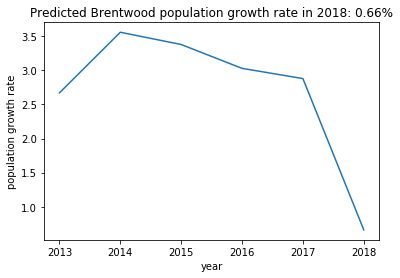

In [168]:
pop2018=reg.predict(X_2018)
year=[2013,2014,2015,2016,2017,2018]
growthrate=[2.67,3.56,3.38,3.03,2.88]
growthrate.append(pop2018)
fig, ax = plt.subplots()
ax.set_xlabel('year')
ax.set_ylabel('population growth rate')
ax.set_title("Predicted Brentwood population growth rate in 2018: {:.2f}%".format(float(pop2018)))
plt.plot(year,growthrate)